In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Plot For TASK 1

In [ ]:
import plotly.express as px
import plotly.io as pio

log_path = "/content/drive/MyDrive/CS648/out.log"
numbers = []
percentages = []

with open(log_path, "r") as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) >= 7:
            number = int(parts[-3])
            percent = float(parts[-1])
            numbers.append(number)
            percentages.append(percent)

import pandas as pd
df = pd.DataFrame({
    "Number": numbers,
    "False Base %": percentages
})

fig = px.scatter(
    df,
    x="Number",
    y="False Base %",
    title="False Base Percentage vs Number",
    labels={"Number": "Composite Number", "False Base %": "False Base Percentage"},
)

fig.update_traces(mode='markers')
fig.update_layout(
    yaxis_range=[0, 100],
    template="plotly_white",
    height=500,
    width=800
)

fig.show()
pio.write_html(fig, file="task1_no_upper_bound.html", auto_open=True)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CS648/primality_tests_sample_timings_AKS_MR_combined.csv")
df.head()

,Bits,Number,AKS_Time(ms),RM_Time(ms),AKS_Result,RM_Result
0,2,3,0.033006,0.000755,Prime,Prime
1,2,2,0.000680,0.000088,Prime,Prime
2,2,3,0.000476,0.000091,Prime,Prime
3,2,3,0.000411,0.000036,Prime,Prime
4,2,2,0.000303,0.000064,Prime,Prime


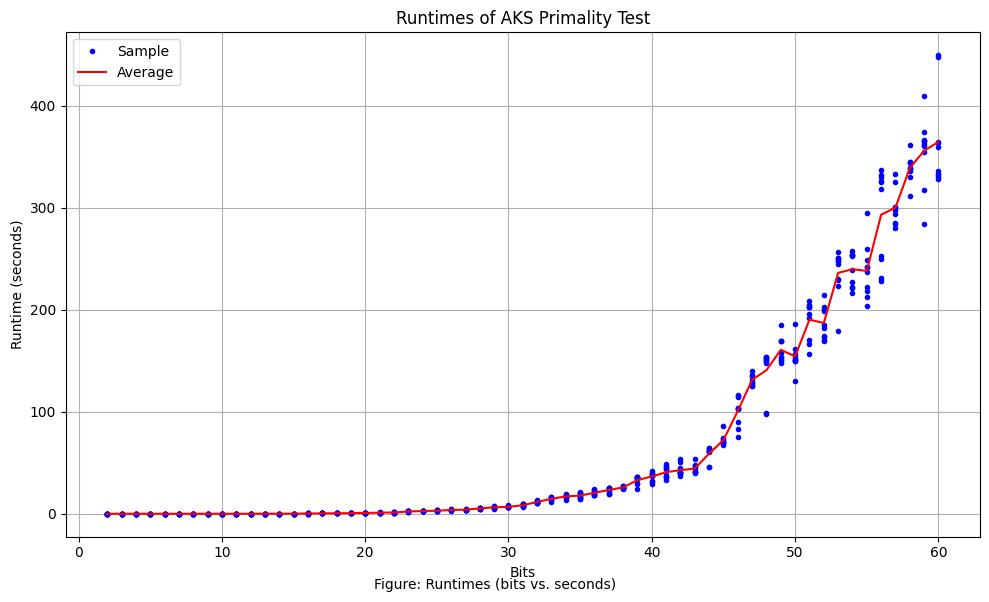

In [ ]:
import matplotlib.pyplot as plt

df_filtered = df[df['Bits'] <= 60]

df_filtered['AKS_Time(s)'] = df_filtered['AKS_Time(ms)'] / 1000.0

grouped = df_filtered.groupby('Bits')['AKS_Time(s)']
avg_runtime = grouped.mean()
bits = avg_runtime.index

plt.figure(figsize=(10, 6))

plt.plot(df_filtered['Bits'], df_filtered['AKS_Time(s)'], 'b.', label='Sample')

plt.plot(bits, avg_runtime.values, 'r-', label='Average')

plt.xlabel("Bits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtimes of AKS Primality Test")
plt.legend()
plt.grid(True)
plt.figtext(0.5, 0.01, "Figure: Runtimes (bits vs. seconds)", ha="center")

plt.tight_layout()
plt.savefig("aks_runtime_plot.png", dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-21-f6205a54af94>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



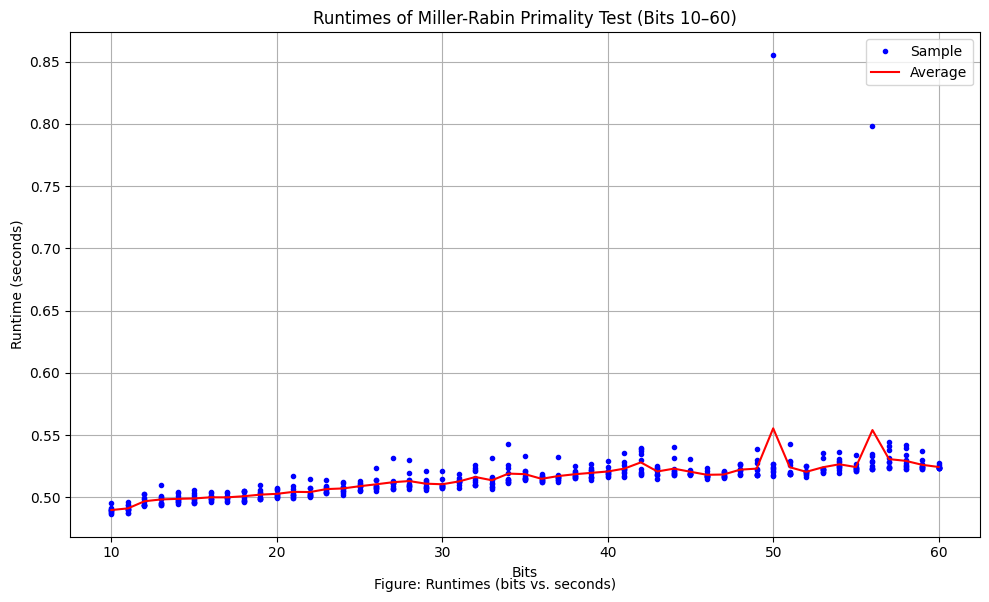

In [ ]:
df_filtered['RM_Time(s)'] = df_filtered['RM_Time(ms)'] / 1.0

df_filtered = df_filtered[(df_filtered['Bits'] >= 10) & (df_filtered['Bits'] <= 60)]

grouped_rm = df_filtered.groupby('Bits')['RM_Time(s)']
avg_runtime_rm = grouped_rm.mean()

plt.figure(figsize=(10, 6))

plt.plot(df_filtered['Bits'], df_filtered['RM_Time(s)'], 'b.', label='Sample')

plt.plot(avg_runtime_rm.index, avg_runtime_rm.values, 'r-', label='Average')

plt.xlabel("Bits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtimes of Miller-Rabin Primality Test (Bits 10–60)")
plt.legend()
plt.grid(True)
plt.figtext(0.5, 0.01, "Figure: Runtimes (bits vs. seconds)", ha="center")

plt.savefig("mr_runtime_plot_10_60.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

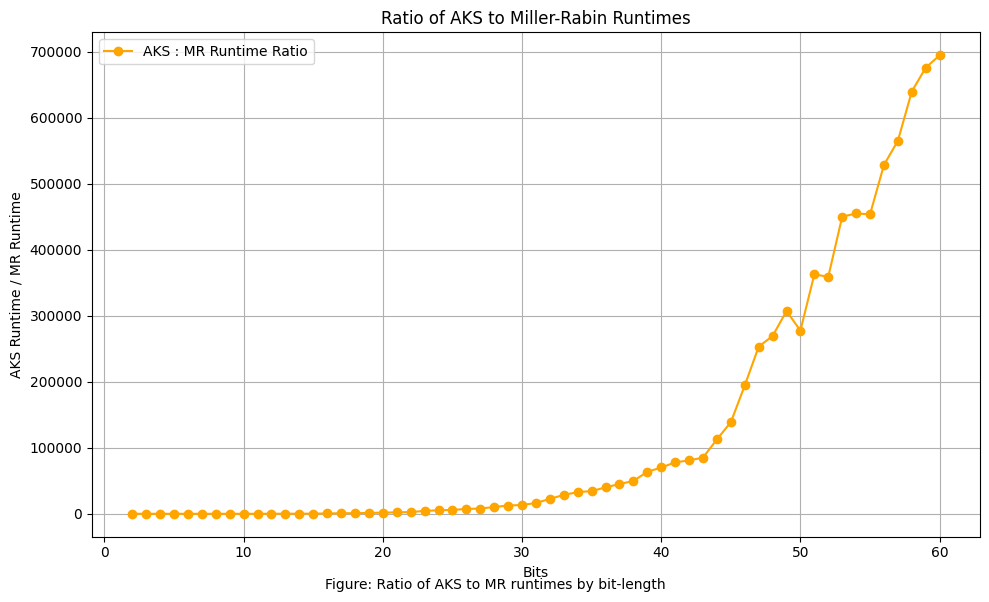

In [ ]:
import matplotlib.pyplot as plt

avg_aks = df_filtered.groupby('Bits')['AKS_Time(s)'].mean()
avg_rm = df_filtered.groupby('Bits')['RM_Time(s)'].mean()

ratio = avg_aks / avg_rm

plt.figure(figsize=(10, 6))
plt.plot(ratio.index, ratio.values, color='orange', marker='o', label='AKS : MR Runtime Ratio')

plt.xlabel("Bits")
plt.ylabel("AKS Runtime / MR Runtime")
plt.title("Ratio of AKS to Miller-Rabin Runtimes")
plt.grid(True)
plt.legend()
plt.figtext(0.5, 0.01, "Figure: Ratio of AKS to MR runtimes by bit-length", ha="center")

plt.savefig("aks_mr_ratio_plot.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

df = pd.read_csv("/content/drive/MyDrive/CS648/combined_times.csv")
df['AKS_Time(s)'] = df['AKS_Time(ms)'] / 1000.0

df_filtered = df[df['Bits'] <= 60]

avg_aks = df_filtered.groupby('Bits')['AKS_Time(s)'].mean()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_filtered['Bits'],
    y=df_filtered['AKS_Time(s)'],
    mode='markers',
    name='Sample',
    marker=dict(color='blue'),
    text=df_filtered['Number'],
    hovertemplate='Bit Length: %{x}<br>Number: %{text}<br>Runtime: %{y:.4f} s'
))

fig.add_trace(go.Scatter(
    x=avg_aks.index,
    y=avg_aks.values,
    mode='lines+markers',
    name='Average',
    line=dict(color='red'),
    hovertemplate='Bit Length: %{x}<br>Avg Runtime: %{y:.4f} s'
))

fig.update_layout(
    title="AKS Primality Test Runtimes",
    xaxis_title="Bits",
    yaxis_title="Runtime (seconds)",
    legend_title="Legend",
    height=700,
    template="plotly_white"
)

pio.write_html(fig, file="aks_runtime.html", auto_open=True)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

df = pd.read_csv("/content/drive/MyDrive/CS648/combined_times.csv")
df['RM_Time(s)'] = df['MR_Time(ms)'] / 1000.0
df_filtered = df[df['Bits'] <= 60]

avg_rm = df_filtered.groupby('Bits')['RM_Time(s)'].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_filtered['Bits'],
    y=df_filtered['RM_Time(s)'],
    mode='markers',
    name='Sample',
    marker=dict(color='blue'),
    text=df_filtered['Number'],
    hovertemplate='Bit Length: %{x}<br>Number: %{text}<br>Runtime: %{y:.6f} s'
))

fig.add_trace(go.Scatter(
    x=avg_rm.index,
    y=avg_rm.values,
    mode='lines+markers',
    name='Average',
    line=dict(color='red'),
    hovertemplate='Bit Length: %{x}<br>Avg Runtime: %{y:.6f} s'
))

fig.update_layout(
    title="Miller-Rabin Primality Test Runtimes",
    xaxis_title="Bits",
    yaxis_title="Runtime (seconds)",
    legend_title="Legend",
    height=700,
    template="plotly_white"
)

pio.write_html(fig, file="mr_runtime.html", auto_open=True)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

df = pd.read_csv("/content/drive/MyDrive/CS648/combined_times.csv")
df['AKS_Time(s)'] = df['AKS_Time(ms)'] / 1000.0
df['RM_Time(s)'] = df['MR_Time(ms)'] / 1000.0
df_filtered = df[df['Bits'] <= 60]

avg_aks = df_filtered.groupby('Bits')['AKS_Time(s)'].mean()
avg_rm = df_filtered.groupby('Bits')['RM_Time(s)'].mean()
ratio = avg_aks / avg_rm

ratio_df = pd.DataFrame({
    'Bits': avg_aks.index,
    'AKS_Time(s)': avg_aks.values,
    'MR_Time(s)': avg_rm.values,
    'AKS/MR Ratio': ratio.values
})

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ratio_df['Bits'],
    y=ratio_df['AKS/MR Ratio'],
    mode='lines+markers',
    name='AKS : MR Runtime Ratio',
    line=dict(color='black'),
    text=[
        f"AKS: {aks:.4f} s<br>MR: {mr:.6f} s"
        for aks, mr in zip(ratio_df['AKS_Time(s)'], ratio_df['MR_Time(s)'])
    ],
    hovertemplate='Bit Length: %{x}<br>AKS/MR Ratio: %{y:.2f}<br>%{text}'
))

fig.update_layout(
    title="Ratio of AKS to Miller-Rabin Runtimes",
    xaxis_title="Bits",
    yaxis_title="AKS Runtime / MR Runtime",
    legend_title="Legend",
    height=700,
    template="plotly_white"
)

pio.write_html(fig, file="aks_mr_ratio.html", auto_open=True)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("/content/drive/MyDrive/CS648/combined_times.csv")

df['AKS_Time(s)'] = df['AKS_Time(ms)'] / 1000.0
df['MR_Time(s)'] = df['MR_Time(ms)'] / 1000.0

df_filtered = df[df['Bits'] <= 60]

avg_aks = df_filtered.groupby('Bits')['AKS_Time(s)'].mean()
avg_mr = df_filtered.groupby('Bits')['MR_Time(s)'].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_filtered['Bits'],
    y=df_filtered['MR_Time(s)'],
    mode='markers',
    name='MR Sample',
    marker=dict(color='blue'),
    text=df_filtered['Number'],
    hovertemplate='Bit Length: %{x}<br>Number: %{text}<br>MR Runtime: %{y:.6f} s'
))

fig.add_trace(go.Scatter(
    x=avg_mr.index,
    y=avg_mr.values,
    mode='lines+markers',
    name='MR Average',
    line=dict(color='red'),
    hovertemplate='Bit Length: %{x}<br>MR Avg Runtime: %{y:.6f} s'
))

fig.add_trace(go.Scatter(
    x=df_filtered['Bits'],
    y=df_filtered['AKS_Time(s)'],
    mode='markers',
    name='AKS Sample',
    marker=dict(color='grey'),
    text=df_filtered['Number'],
    hovertemplate='Bit Length: %{x}<br>Number: %{text}<br>AKS Runtime: %{y:.6f} s'
))

fig.add_trace(go.Scatter(
    x=avg_aks.index,
    y=avg_aks.values,
    mode='lines+markers',
    name='AKS Average',
    line=dict(color='black'),
    hovertemplate='Bit Length: %{x}<br>AKS Avg Runtime: %{y:.6f} s'
))

fig.update_layout(
    title="AKS vs MR Primality Test Runtimes (Bits ≤ 60)",
    xaxis_title="Bits",
    yaxis_title="Runtime (seconds)",
    legend_title="Legend",
    height=700,
    template="plotly_white"
)

fig.write_html("aks_vs_mr_runtime.html", auto_open=False)
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

df = pd.read_csv("/content/drive/MyDrive/CS648/combined_times.csv")
df = df[(df['Bits'] <= 60) & (df['Bits'] >= 15)]
df['AKS_Time(s)'] = df['AKS_Time(ms)'] / 1000.0
df['MR_Time(s)'] = df['MR_Time(ms)'] / 1000.0

avg_aks = df.groupby('Bits')['AKS_Time(s)'].mean()
avg_mr = df.groupby('Bits')['MR_Time(s)'].mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Bits'],
    y=df['MR_Time(s)'],
    mode='markers',
    name='MR Sample',
    marker=dict(color='blue'),
    text=df['Number'],
    hovertemplate='Bit Length: %{x}<br>Number: %{text}<br>MR Time: %{y:.4e} s'
))

fig.add_trace(go.Scatter(
    x=avg_mr.index,
    y=avg_mr.values,
    mode='lines+markers',
    name='MR Avg',
    line=dict(color='red'),
    hovertemplate='Bit Length: %{x}<br>MR Avg Time: %{y:.4e} s'
))

fig.add_trace(go.Scatter(
    x=df['Bits'],
    y=df['AKS_Time(s)'],
    mode='markers',
    name='AKS Sample',
    marker=dict(color='gray'),
    text=df['Number'],
    hovertemplate='Bit Length: %{x}<br>Number: %{text}<br>AKS Time: %{y:.4e} s'
))

fig.add_trace(go.Scatter(
    x=avg_aks.index,
    y=avg_aks.values,
    mode='lines+markers',
    name='AKS Avg',
    line=dict(color='black'),
    hovertemplate='Bit Length: %{x}<br>AKS Avg Time: %{y:.4e} s'
))

fig.update_layout(
    title="AKS vs MR Primality Test Runtimes (Log Scale)",
    xaxis_title="Bits",
    yaxis_title="Runtime (seconds, log scale)",
    legend_title="Legend",
    height=700,
    yaxis_type="log",
    template="plotly_white"
)

pio.write_html(fig, file="aks_vs_mr_logscale.html", auto_open=True)
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

df_mr = pd.read_csv("/content/drive/MyDrive/CS648/sophie_germain_primes.csv", parse_dates=["End_Timestamp"])
df_aks = pd.read_csv("/content/drive/MyDrive/CS648/sophie_germain_primes_aks.csv", parse_dates=["End_Timestamp"])

df_mr["Minute"] = df_mr["End_Timestamp"].dt.floor("min")
df_aks["Minute"] = df_aks["End_Timestamp"].dt.floor("min")

grouped_mr = df_mr.groupby("Minute").size().cumsum().reset_index()
grouped_aks = df_aks.groupby("Minute").size().cumsum().reset_index()

grouped_mr.columns = ["Timestamp", "Cumulative_Count"]
grouped_mr["Source"] = "Miller-Rabin"

grouped_aks.columns = ["Timestamp", "Cumulative_Count"]
grouped_aks["Source"] = "AKS"

combined = pd.concat([grouped_mr, grouped_aks])

combined["Formatted_Timestamp"] = combined["Timestamp"].dt.strftime("%Y-%m-%d %H:%M")

fig = px.bar(
    combined,
    x="Source",
    y="Cumulative_Count",
    color="Source",
    animation_frame="Formatted_Timestamp",
    barmode="group",
    range_y=[0, combined["Cumulative_Count"].max() * 1.1],
    labels={"Cumulative_Count": "Count"},
    title="Timelapse of Cumulative Sophie Germain Primes (Per Minute): MR vs AKS"
)

fig.update_layout(
    yaxis_title="Cumulative Count",
    showlegend=True,
    template="plotly_white",
    updatemenus=[{
        "type": "buttons",
        "buttons": [{
            "label": "Play",
            "method": "animate",
            "args": [None, {
                "frame": {"duration": 100, "redraw": True},
                "fromcurrent": True
            }]
        }]
    }]
)

fig.show()

In [ ]:
import plotly.io as pio

file_path = '/content/drive/MyDrive/CS648/conflict_summary_error_prob.txt'

k_values = []
conflict_counts = []

with open(file_path, "r") as file:
    for line in file:
        if line.strip():
            k, count = line.strip().split(":")
            k_values.append(int(k[1:]))
            conflict_counts.append(int(count.strip()))

import plotly.graph_objects as go

bar_fig = go.Figure()
bar_fig.add_trace(go.Bar(x=k_values, y=conflict_counts, marker_color='indianred'))
bar_fig.update_layout(
    title="Conflicts vs Repetitions (k) - Bar Graph",
    xaxis_title="k (Number of Repetitions)",
    yaxis_title="Conflict Count (up to 1e8)",
    template="plotly_white"
)

line_fig = go.Figure()
line_fig.add_trace(go.Scatter(x=k_values, y=conflict_counts, mode='lines+markers', line=dict(color='royalblue')))
line_fig.update_layout(
    title="Conflicts vs Repetitions (k) - Line Graph",
    xaxis_title="k (Number of Repetitions)",
    yaxis_title="Conflict Count (up to 1e8)",
    template="plotly_white"
)

bar_fig.show()
line_fig.show()

pio.write_html(bar_fig, file="practical_error_prob.html", auto_open=True)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

df = pd.read_csv("/content/drive/MyDrive/CS648/mr_runtime_results.csv")

df["TimeTaken(s)"] = df["TimeTaken(ms)"] / 1000

avg_runtime = df.groupby("BitLength")["TimeTaken(s)"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["BitLength"],
    y=df["TimeTaken(s)"],
    mode="markers",
    marker=dict(color="skyblue", size=4),
    name="Sample"
))

fig.add_trace(go.Scatter(
    x=avg_runtime["BitLength"],
    y=avg_runtime["TimeTaken(s)"],
    mode="lines",
    line=dict(color="red", width=2),
    name="Average"
))

fig.update_layout(
    title="Runtimes of Miller-Rabin Primality Test",
    xaxis_title="Bits",
    yaxis_title="Runtime (seconds)",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white",
    height=600,
    width=1000
)

fig.show()
pio.write_html(fig, file="mr_runtime_2_to_4096_bits.html", auto_open=True)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

df = pd.read_csv("/content/drive/MyDrive/CS648/mr_runtime_results.csv")
df["TimeTaken(s)"] = df["TimeTaken(ms)"] / 1000
df = df.sort_values("BitLength")

step = 32
bit_lengths = sorted(df["BitLength"].unique())
reduced_bits = bit_lengths[::step]

frames = []
for bit in reduced_bits:
    frame_df = df[df["BitLength"] <= bit]
    avg_df = frame_df.groupby("BitLength")["TimeTaken(s)"].mean().reset_index()

    frames.append(go.Frame(
        data=[
            go.Scatter(
                x=frame_df["BitLength"],
                y=frame_df["TimeTaken(s)"],
                mode="markers",
                marker=dict(color="skyblue", size=4),
                name="Sample"
            ),
            go.Scatter(
                x=avg_df["BitLength"],
                y=avg_df["TimeTaken(s)"],
                mode="lines",
                line=dict(color="red", width=2),
                name="Average"
            )
        ],
        name=str(bit)
    ))

init_bit = reduced_bits[0]
init_df = df[df["BitLength"] <= init_bit]
init_avg = init_df.groupby("BitLength")["TimeTaken(s)"].mean().reset_index()

fig = go.Figure(
    data=[
        go.Scatter(
            x=init_df["BitLength"],
            y=init_df["TimeTaken(s)"],
            mode="markers",
            marker=dict(color="skyblue", size=4),
            name="Sample"
        ),
        go.Scatter(
            x=init_avg["BitLength"],
            y=init_avg["TimeTaken(s)"],
            mode="lines",
            line=dict(color="red", width=2),
            name="Average"
        )
    ],
    frames=frames
)

fig.update_layout(
    title="Frame-wise Runtimes of Miller-Rabin Primality Test (Every 32 Bits)",
    xaxis_title="Bits",
    yaxis_title="Runtime (seconds)",
    template="plotly_white",
    updatemenus=[{
        "type": "buttons",
        "showactive": False,
        "buttons": [
            {
                "label": "Play",
                "method": "animate",
                "args": [None, {
                    "frame": {"duration": 200, "redraw": True},
                    "fromcurrent": True
                }]
            },
            {
                "label": "Pause",
                "method": "animate",
                "args": [[None], {"mode": "immediate", "frame": {"duration": 0}, "transition": {"duration": 0}}]
            }
        ]
    }],
    sliders=[{
        "steps": [
            {
                "method": "animate",
                "label": str(bit),
                "args": [[str(bit)], {"frame": {"duration": 0}, "mode": "immediate"}]
            }
            for bit in reduced_bits
        ],
        "transition": {"duration": 0},
        "x": 0,
        "y": -0.15,
        "currentvalue": {"prefix": "BitLength: "}
    }]
)

fig.show()
pio.write_html(fig, file="mr_runtime_2_to_4096_bits_framewise.html", auto_open=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

df_mr = pd.read_csv("/content/drive/MyDrive/CS648/mr_runtime_results.csv")
df_mr["TimeTaken(s)"] = df_mr["TimeTaken(ms)"] / 1000
avg_mr = df_mr.groupby("BitLength")["TimeTaken(s)"].mean().reset_index()

df_aks_all = pd.read_csv("/content/drive/MyDrive/CS648/primality_tests_sample_timings_AKS_MR_combined.csv")
df_aks_filtered = df_aks_all[df_aks_all['Bits'] <= 60].copy()
df_aks_filtered['AKS_Time(s)'] = df_aks_filtered['AKS_Time(ms)'] / 1000
avg_aks = df_aks_filtered.groupby("Bits")["AKS_Time(s)"].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_mr["BitLength"],
    y=df_mr["TimeTaken(s)"],
    mode="markers",
    marker=dict(color="skyblue", size=4),
    name="Miller-Rabin Samples"
))

fig.add_trace(go.Scatter(
    x=avg_mr["BitLength"],
    y=avg_mr["TimeTaken(s)"],
    mode="lines",
    line=dict(color="red", width=2),
    name="Miller-Rabin Avg"
))

fig.add_trace(go.Scatter(
    x=avg_aks["Bits"],
    y=avg_aks["AKS_Time(s)"],
    mode="lines+markers",
    line=dict(color="black", width=2, dash="dash"),
    marker=dict(symbol="circle", size=6),
    name="AKS Avg (≤60 bits)"
))

fig.update_layout(
    title="Runtimes of Miller-Rabin vs AKS Primality Tests",
    xaxis_title="Bits",
    yaxis_title="Runtime (seconds)",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white",
    height=600,
    width=1000
)

fig.show()
pio.write_html(fig, file="mr_plus_aks_times_upto_max_limit_possible.html", auto_open=True)